<a href="https://colab.research.google.com/github/KaylumCassidy/FYP/blob/main/Predicting_Wind_Energy_Generation__C20323831_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting wind energy generation to enable transmission system operator (TSO) supply planning.**

This dissertation focuses on using high-frequency short-term weather forecasting to predict wind production in Ireland. The aim is to prepare microgrid control systems for periods of low wind power generation, crucial for stabilizing the country's energy mix. Clear objectives include testing predictive analytical techniques, finding the most accurate model algorithm, determining influential weather variables, and validating against existing models

## Irish weather data

### Import libraries

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime
minDate = "2017-01-01 00:00:00"

In [25]:
  # This Python 3 environment comes with many helpful analytics libraries installed
  # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
  # For example, here's several helpful packages to load in

  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

  import io
  import requests

  import plotly.offline as py
  py.init_notebook_mode(connected=True)
  import plotly.graph_objs as go
  from plotly import tools
  import plotly.figure_factory as ff
  from plotly.subplots import make_subplots

  import warnings
  warnings.filterwarnings('ignore')

  import matplotlib.pyplot as plt
  plt.style.use('seaborn-whitegrid')

  from datetime import tzinfo, timedelta, datetime, date

In [26]:
minDate = "2017-01-01 00:00:00"

### Loading MerEire dataset 2017-2023

This dataset is from MetEire website form 2017-2023 I choose 7 weather station(Dublin Airport, Shannon Airport, Mayo, Donegal, Galway, Cork) each recroding every hour of evvery day. (Dataset colm meaning in photo below)

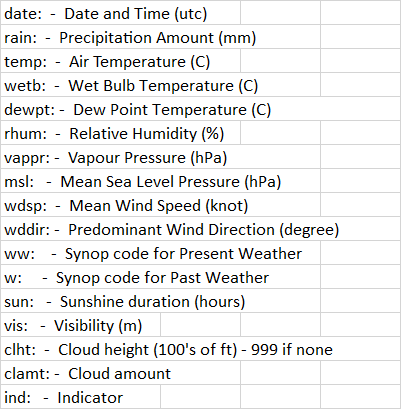![image.png]()

**CORK**

In [27]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/CorkAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
corkairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(corkairportds.columns)

# Convert the 'date' column to datetime format
corkairportds['date'] = pd.to_datetime(corkairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
corkairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
corkairportds['wdsp'] = corkairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
corkairportds = corkairportds[corkairportds['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


**Shannon Airport**

In [28]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/ShannonAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
shannonAirport = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(shannonAirport.columns)

# Convert the 'date' column to datetime format
shannonAirport['date'] = pd.to_datetime(shannonAirport['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
shannonAirport['wdsp'].replace(to_replace=' ', value=0, inplace=True)
shannonAirport['wdsp'] = shannonAirport['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
shannonAirport = shannonAirport[shannonAirport['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


**Galway**

In [29]:
import pandas as pd
import requests
from io import StringIO


github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Galway.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
galway = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(galway.columns)

# Convert the 'date' column to datetime format
galway['date'] = pd.to_datetime(galway['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
galway['wdsp'].replace(to_replace=' ', value=0, inplace=True)
galway['wdsp'] = galway['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
galway = galway[galway['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


**Dublin Airport**

In [30]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/DublinAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
dublinairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(dublinairportds.columns)

# Convert the 'date' column to datetime format
dublinairportds['date'] = pd.to_datetime(dublinairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
dublinairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
dublinairportds['wdsp'] = dublinairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
dublinairportds = dublinairportds[dublinairportds['date'] >= minDate]


Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


In [31]:
dublinairportds.describe()

ind          rain         ind.1          temp         ind.2  \
count  61345.000000  61345.000000  61345.000000  61345.000000  61345.000000   
mean       0.493765      0.087166      0.019594     10.113817      0.027614   
std        0.980092      0.420248      0.138602      5.062082      0.163866   
min        0.000000      0.000000      0.000000     -5.600000      0.000000   
25%        0.000000      0.000000      0.000000      6.600000      0.000000   
50%        0.000000      0.000000      0.000000     10.100000      0.000000   
75%        0.000000      0.000000      0.000000     13.700000      0.000000   
max        3.000000     13.800000      1.000000     29.100000      1.000000   

               wetb        dewpt         vappr          rhum           msl  \
count  61345.000000  61345.00000  61345.000000  61345.000000  61345.000000   
mean       8.597198      6.93634     10.400083     81.755172   1013.401697   
std        4.457445      4.52180      3.173393     11.991678     12.671529   
min       -5.900000     -8.90000      3.100000     24.000000    961.800000   
25%        5.400000      3.60000      7.900000     74.000000   1005.400000   
50%        8.700000      7.10000     10.100000     84.000000   1014.900000   
75%       12.000000     10.20000     12.500000     91.000000   1022.300000   
max       21.400000     19.50000     22.600000    100.000000   1048.200000   

              ind.3          wdsp         ind.4         wddir            ww  \
count  61345.000000  61345.000000  61345.000000  61345.000000  61345.000000   
mean       2.000065      9.475866      2.000065    206.367919     14.756769   
std        0.011420      4.681316      0.011420     81.329671     22.707006   
min        2.000000      0.000000      2.000000      0.000000      1.000000   
25%        2.000000      6.000000      2.000000    140.000000      2.000000   
50%        2.000000      9.000000      2.000000    230.000000      2.000000   
75%        2.000000     12.000000      2.000000    270.000000     21.000000   
max        4.000000     44.000000      4.000000    360.000000     97.000000   

                  w           sun          clht         clamt  
count  61345.000000  61345.000000  61345.000000  61345.000000  
mean      29.447388      0.169494    286.170055      5.583797  
std       26.964605      0.323256    401.147943      2.223360  
min        0.000000      0.000000      0.000000      0.000000  
25%       11.000000      0.000000     24.000000      4.000000  
50%       11.000000      0.000000     50.000000      7.000000  
75%       62.000000      0.100000    250.000000      7.000000  
max       98.000000      1.000000    999.000000      9.000000

**Malin Head(Donengal)**

In [32]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Malin%20Head.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
malinHead = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(malinHead.columns)

# Convert the 'date' column to datetime format
malinHead['date'] = pd.to_datetime(malinHead['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
malinHead['wdsp'].replace(to_replace=' ', value=0, inplace=True)
malinHead['wdsp'] = malinHead['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
malinHead = malinHead[malinHead['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


**BELMULLET**

In [33]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/BELMULLET.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
belmullet = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(belmullet.columns)

# Convert the 'date' column to datetime format
belmullet['date'] = pd.to_datetime(belmullet['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
belmullet['wdsp'].replace(to_replace=' ', value=0, inplace=True)
belmullet['wdsp'] = belmullet['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
belmullet = belmullet[belmullet['date'] >= minDate]

# Now you can continue with your data analysis or processi

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


### Merge Irish weather Dataset*

In [34]:
left = belmullet.set_index(['date']).copy()
right = dublinairportds.set_index(['date'])
#right.index = right.index.tz_convert(None)

newdf = left.join(right, lsuffix="_BEL", rsuffix="_DUB")

right = shannonAirport.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_SHA")

right = corkairportds.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_COR")

right = galway.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_GAL")

right = malinHead.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_DON")

newdf = newdf.reset_index()

In [35]:

newdf.columns

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       ...
       'ind.2_DON', 'wetb_DON', 'dewpt_DON', 'vappr_DON', 'rhum_DON',
       'msl_DON', 'ind.3_DON', 'wdsp_DON', 'ind.4_DON', 'wddir_DON'],
      dtype='object', length=103)

In [36]:

newdf

date  ind_BEL  rain_BEL  ind.1_BEL  temp_BEL  ind.2_BEL  \
0     2017-01-01 00:00:00        0       0.0          0       5.2          0   
1     2017-01-01 01:00:00        0       0.5          0       4.7          0   
2     2017-01-01 02:00:00        0       0.0          0       5.7          0   
3     2017-01-01 03:00:00        0       0.4          0       5.6          0   
4     2017-01-01 04:00:00        0       0.6          0       4.7          0   
...                   ...      ...       ...        ...       ...        ...   
61340 2023-12-31 20:00:00        0       0.1          0       8.2          0   
61341 2023-12-31 21:00:00        0       0.0          0       7.6          0   
61342 2023-12-31 22:00:00        0       0.0          0       7.5          0   
61343 2023-12-31 23:00:00        0       0.1          0       7.4          0   
61344 2024-01-01 00:00:00        0       0.1          0       7.5          0   

       wetb_BEL  dewpt_BEL  vappr_BEL  rhum_BEL  ...  ind.2_DON  wetb_DON  \
0           3.9        2.0        7.1        79  ...          0       4.3   
1           3.4        1.4        6.8        78  ...          0       4.1   
2           3.8        0.7        6.4        70  ...          0       4.1   
3           3.3       -0.6        5.9        64  ...          0       4.5   
4           3.1        0.5        6.3        74  ...          0       4.6   
...         ...        ...        ...       ...  ...        ...       ...   
61340       6.5        4.3        8.3        76  ...          0       6.6   
61341       5.9        3.7        8.0        76  ...          0       6.2   
61342       5.9        3.6        7.9        76  ...          0       6.6   
61343       5.7        3.4        7.8        75  ...          0       6.3   
61344       6.0        3.9        8.1        77  ...          0       5.9   

       dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  wdsp_DON  \
0            1.4        6.7        70   1020.6          2      19.0   
1            2.2        7.2        80   1021.1          2      22.0   
2            1.0        6.6        69   1021.6          2      24.0   
3            1.6        6.8        70   1022.0          2      23.0   
4            1.7        6.9        71   1022.4          2      27.0   
...          ...        ...       ...      ...        ...       ...   
61340        5.6        9.1        89    985.0          2      25.0   
61341        5.2        8.8        88    986.4          2      32.0   
61342        5.3        8.9        85    988.0          2      27.0   
61343        4.4        8.4        79    988.7          2      23.0   
61344        3.7        8.0        77    989.8          2      24.0   

       ind.4_DON  wddir_DON  
0              2        340  
1              2        340  
2              2        350  
3              2        360  
4              2        360  
...          ...        ...  
61340          2        300  
61341          2        310  
61342          2        320  
61343          2        310  
61344          2        300  

[61345 rows x 103 columns]

In [37]:
newdf['wdsp_BEL'].describe()

count    61345.000000
mean        11.884114
std          6.536866
min          0.000000
25%          7.000000
50%         11.000000
75%         16.000000
max         45.000000
Name: wdsp_BEL, dtype: float64

In [38]:

newdf.to_csv("IrelandWeatherData.csv", index=False)

## Eirgrid data

### Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

### Data Scraping Eirgrid data

This data was scape form EirGrid Dashbored - https://www.smartgriddashboard.com/#all/wind

**Eirgrid Wind generation**

In [ ]:

#sample_url  = 'https://www.smartgriddashboard.com/DashboardService.svc/data?area=windactual&region=ALL&datefrom=01-Jan-2022+00%3A00&dateto=31-Jan-2023+23%3A59'

sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2018%2000:00&dateto=31-Jan-2018%2023:59'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-'
url_mid = '%2000:00&dateto='
url_end = '%2023:59'

years = ['2017', '2018', '2019', '2020', '2021']
  #years = ['2020', '2021']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
endDay= [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Aug 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)


wgds = pd.concat(tempds, keys=months_years)

wgds = wgds.reset_index()
wgds = wgds.drop('level_0', axis=1)
wgds = wgds.drop('level_1', axis=1)
wgds = wgds.drop('DATE & TIME', axis=1)



http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jul-2017%2000:00&datet

**Eirgrid Actual System Generation**

In [ ]:

  # Wind energy Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=23-Jan-2021%2000:00&dateto=21-Feb-2021%2001:15'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-'

tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


sgds = pd.concat(tempds, keys=months_years)

sgds = sgds.reset_index()
sgds = sgds.drop('level_0', axis=1)
sgds = sgds.drop('level_1', axis=1)
sgds = sgds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&reg

**System Demand: Actual and Prediction**

In [ ]:
  # Demand Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=18-Jan-2021%2000:00&dateto=16-Feb-2021%2023:59'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-'

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
       # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)

sdds = pd.concat(tempds, keys=months_years)
sdds = sdds.reset_index()
sdds = sdds.drop('level_0', axis=1)
sdds = sdds.drop('level_1', axis=1)
sdds = sdds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jul-2017

In [ ]:


  # Interconnections Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=27-Jan-2021%2000:00&dateto=25-Feb-2021%2022:00'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-'

url_mid = '%2000:00&dateto='
url_end = '%2023:59'

tempds = []
months_years = []

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)

icds = pd.concat(tempds, keys=months_years)
icds = icds.reset_index()
icds = icds.drop('level_0', axis=1)
icds = icds.drop('level_1', axis=1)
icds = icds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL

### Merge all of EirGrid data based on Date

In [ ]:

left = sdds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
middle = wgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
right = sgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  #right.index = right.index.tz_convert(None)

newdf2 = left.join(middle)
newdf2 = newdf2.join(right)
newdf2 = newdf2.reset_index()

newdf2 = newdf2.rename(columns={' ACTUAL DEMAND(MW)' : 'ActualDemandMW'})
newdf2 = newdf2.rename(columns={'  ACTUAL WIND(MW)' : 'ActualWindMW'})

newdf2 = newdf2.rename(columns={' FORECAST WIND(MW)' : 'ForecastWndMW'})
newdf2 = newdf2.rename(columns={' ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})


  # Region doesn't apply to Interconnections
left = newdf2.set_index(['date', 'Year', 'Month', 'DayTime'])
right = icds.set_index(['date', 'Year', 'Month', 'DayTime'])
newdf2 = left.join(right)
newdf2 = newdf2.reset_index()
newdf2 = newdf2.rename(columns={' NET TOTAL(MW)': 'NetTotal_MW'})
newdf2 = newdf2.rename(columns={' EWIC(MW)': 'EWIC_MW'})
newdf2 = newdf2.rename(columns={' MOYLE(MW)': 'MOYLE_MW'})

newdf2.to_csv("IslandElectricityOnly2017_2020v3.csv")


def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf2 = newdf2.apply(settimeatt, axis='columns')

newdf2.head()

date  Year Month    DayTime      REGION  ActualDemandMW  \
0 2017-01-01 00:00:00  2017   Jan  01, 00:00  All Island          3696.0   
1 2017-01-01 00:15:00  2017   Jan  01, 00:15  All Island          3661.0   
2 2017-01-01 00:30:00  2017   Jan  01, 00:30  All Island          3622.0   
3 2017-01-01 00:45:00  2017   Jan  01, 00:45  All Island          3492.0   
4 2017-01-01 01:00:00  2017   Jan  01, 01:00  All Island          3457.0   

    FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ActualGenerationMW  \
0                   NaN         1172.0        1214.0              4126.0   
1                   NaN         1198.0        1168.0              4184.0   
2                   NaN         1224.0        1131.0              4187.0   
3                   NaN         1250.0        1025.0              4059.0   
4                   NaN         1280.0        1123.0              4094.0   

   NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  month  year  
0       -448.0   -170.0    -278.0     0      False      1  2017  
1       -541.0   -244.0    -297.0     0      False      1  2017  
2       -583.0   -286.0    -297.0     0      False      1  2017  
3       -585.0   -287.0    -298.0     0      False      1  2017  
4       -584.0   -287.0    -297.0     1      False      1  2017

In [ ]:
  #fileP = 'IslandElectricityOnly2017_2020v3.csv'
fileP = 'IslandElectricityOnly2017_2020v3.csv'
newdf = pd.read_csv(fileP, parse_dates=[1])

newdf["hour"] = 0
newdf["isweekday"] = False
newdf["month"] = 0
newdf["year"] = 0

def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf = newdf.apply(settimeatt, axis='columns')

newdf.head()

Unnamed: 0                date  Year Month    DayTime      REGION  \
0           0 2017-01-01 00:00:00  2017   Jan  01, 00:00  All Island   
1           1 2017-01-01 00:15:00  2017   Jan  01, 00:15  All Island   
2           2 2017-01-01 00:30:00  2017   Jan  01, 00:30  All Island   
3           3 2017-01-01 00:45:00  2017   Jan  01, 00:45  All Island   
4           4 2017-01-01 01:00:00  2017   Jan  01, 01:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  \
0          3696.0                   NaN         1172.0        1214.0   
1          3661.0                   NaN         1198.0        1168.0   
2          3622.0                   NaN         1224.0        1131.0   
3          3492.0                   NaN         1250.0        1025.0   
4          3457.0                   NaN         1280.0        1123.0   

   ActualGenerationMW  NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  month  \
0              4126.0       -448.0   -170.0    -278.0     0      False      1   
1              4184.0       -541.0   -244.0    -297.0     0      False      1   
2              4187.0       -583.0   -286.0    -297.0     0      False      1   
3              4059.0       -585.0   -287.0    -298.0     0      False      1   
4              4094.0       -584.0   -287.0    -297.0     1      False      1   

   year  
0  2017  
1  2017  
2  2017  
3  2017  
4  2017

In [ ]:
newdf.columns

Index(['Unnamed: 0', 'date', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year'],
      dtype='object')

In [ ]:

# Checking how many months do we have in our dataset (if the year is complete)
newdf.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:

print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.tail()

-----------DATA SIZE -------------
(166480, 18)
Rows:  166480 , Columns:  18
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166480 entries, 0 to 166479
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            166480 non-null  int64         
 1   date                  166480 non-null  datetime64[ns]
 2   Year                  166480 non-null  int64         
 3   Month                 166480 non-null  object        
 4   DayTime               166480 non-null  object        
 5    REGION               166480 non-null  object        
 6   ActualDemandMW        166410 non-null  float64       
 7    FORECAST DEMAND(MW)  0 non-null       float64       
 8   ForecastWndMW         166341 non-null  float64       
 9   ActualWindMW          166410 non-null  float64       
 10  ActualGenerationMW    166410 non-null  float64       
 11  NetTo

Unnamed: 0                date  Year Month    DayTime      REGION  \
166475      166475 2021-09-30 22:45:00  2021   Sep  30, 22:45  All Island   
166476      166476 2021-09-30 23:00:00  2021   Sep  30, 23:00  All Island   
166477      166477 2021-09-30 23:15:00  2021   Sep  30, 23:15  All Island   
166478      166478 2021-09-30 23:30:00  2021   Sep  30, 23:30  All Island   
166479      166479 2021-09-30 23:45:00  2021   Sep  30, 23:45  All Island   

        ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  \
166475          4168.0                   NaN         3300.0        2416.0   
166476          4041.0                   NaN         3356.0        2409.0   
166477          3901.0                   NaN         3375.0        2462.0   
166478          3797.0                   NaN         3395.0        2567.0   
166479          3705.0                   NaN         3414.0        2532.0   

        ActualGenerationMW  NetTotal_MW  EWIC_MW  MOYLE_MW  hour  isweekday  \
166475              4769.0       -612.0   -294.0    -318.0    22       True   
166476              4674.0       -645.0   -339.0    -306.0    23       True   
166477              4428.0       -535.0   -266.0    -269.0    23       True   
166478              4359.0       -500.0   -191.0    -309.0    23       True   
166479              4278.0       -508.0   -196.0    -312.0    23       True   

        month  year  
166475      9  2021  
166476      9  2021  
166477      9  2021  
166478      9  2021  
166479      9  2021

## Load Weather Data

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IrelandWeatherData.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
weatherData = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(weatherData.columns)

weatherds = pd.read_csv("IrelandWeatherData(2).csv", na_values=" ")

weatherds

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       ...
       'ind.2_DON', 'wetb_DON', 'dewpt_DON', 'vappr_DON', 'rhum_DON',
       'msl_DON', 'ind.3_DON', 'wdsp_DON', 'ind.4_DON', 'wddir_DON'],
      dtype='object', length=103)


date  ind_BEL  rain_BEL  ind.1_BEL  temp_BEL  ind.2_BEL  \
0      01/01/2017 00:00        0       0.0          0       5.2          0   
1      01/01/2017 01:00        0       0.5          0       4.7          0   
2      01/01/2017 02:00        0       0.0          0       5.7          0   
3      01/01/2017 03:00        0       0.4          0       5.6          0   
4      01/01/2017 04:00        0       0.6          0       4.7          0   
...                 ...      ...       ...        ...       ...        ...   
41612  30/09/2021 20:00        0       0.0          0      13.0          0   
41613  30/09/2021 21:00        0       0.0          0      12.8          0   
41614  30/09/2021 22:00        0       0.2          0      13.0          0   
41615  30/09/2021 23:00        0       1.4          0      11.8          0   
41616  01/10/2021 00:00        0       0.0          0      12.7          0   

       wetb_BEL  dewpt_BEL  vappr_BEL  rhum_BEL  ...  ind.2_DON  wetb_DON  \
0           3.9        2.0        7.1        79  ...          0       4.3   
1           3.4        1.4        6.8        78  ...          0       4.1   
2           3.8        0.7        6.4        70  ...          0       4.1   
3           3.3       -0.6        5.9        64  ...          0       4.5   
4           3.1        0.5        6.3        74  ...          0       4.6   
...         ...        ...        ...       ...  ...        ...       ...   
41612      11.9       10.9       13.1        87  ...          0      11.1   
41613      11.9       11.1       13.2        89  ...          0      10.9   
41614      12.3       11.6       13.7        91  ...          0      10.6   
41615      10.9       10.1       12.3        89  ...          0      11.0   
41616      11.0        9.4       11.8        80  ...          0      10.7   

       dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  wdsp_DON  \
0            1.4        6.7        70   1020.6          2        19   
1            2.2        7.2        80   1021.1          2        22   
2            1.0        6.6        69   1021.6          2        24   
3            1.6        6.8        70   1022.0          2        23   
4            1.7        6.9        71   1022.4          2        27   
...          ...        ...       ...      ...        ...       ...   
41612       10.4       12.6        91   1001.1          2        11   
41613       10.3       12.5        92   1000.4          2         8   
41614       10.1       12.3        93    999.6          2         7   
41615       10.6       12.8        94    998.5          2         8   
41616       10.2       12.5        94    997.0          2        10   

       ind.4_DON  wddir_DON  
0              2      340.0  
1              2      340.0  
2              2      350.0  
3              2      360.0  
4              2      360.0  
...          ...        ...  
41612          2      210.0  
41613          2      200.0  
41614          2      190.0  
41615          2      170.0  
41616          2      180.0  

[41617 rows x 97 columns]

In [ ]:

weatherds.describe()

ind_BEL      rain_BEL  ind.1_BEL      temp_BEL  ind.2_BEL  \
count  41617.0  41617.000000    41617.0  41617.000000    41617.0   
mean       0.0      0.151734        0.0     10.526352        0.0   
std        0.0      0.494055        0.0      4.013934        0.0   
min        0.0      0.000000        0.0     -3.300000        0.0   
25%        0.0      0.000000        0.0      7.700000        0.0   
50%        0.0      0.000000        0.0     10.500000        0.0   
75%        0.0      0.000000        0.0     13.500000        0.0   
max        0.0     10.200000        0.0     28.000000        0.0   

           wetb_BEL     dewpt_BEL     vappr_BEL      rhum_BEL       msl_BEL  \
count  41617.000000  41617.000000  41617.000000  41617.000000  41617.000000   
mean       9.100848      7.490799     10.748379     81.810006   1012.057431   
std        3.813173      4.272689      3.065398     11.207680     13.183539   
min       -4.400000     -9.700000      2.900000     24.000000    959.100000   
25%        6.300000      4.300000      8.300000     74.000000   1003.700000   
50%        9.200000      7.700000     10.500000     84.000000   1013.600000   
75%       12.000000     10.600000     12.800000     91.000000   1021.300000   
max       22.100000     19.400000     22.500000    100.000000   1050.600000   

       ...  ind.2_DON      wetb_DON     dewpt_DON     vappr_DON      rhum_DON  \
count  ...    41617.0  41617.000000  41617.000000  41617.000000  41617.000000   
mean   ...        0.0      8.703477      7.054180     10.439527     81.351107   
std    ...        0.0      3.804861      4.294393      3.015872      9.886587   
min    ...        0.0     -3.000000     -7.900000      3.400000     20.000000   
25%    ...        0.0      5.800000      3.800000      8.000000     75.000000   
50%    ...        0.0      8.700000      7.200000     10.100000     82.000000   
75%    ...        0.0     11.700000     10.300000     12.500000     89.000000   
max    ...        0.0     19.800000     17.900000     20.500000    100.000000   

            msl_DON  ind.3_DON      wdsp_DON     ind.4_DON     wddir_DON  
count  41617.000000    41617.0  41617.000000  41617.000000  41615.000000  
mean    1011.589062        2.0     14.706754      2.000240    199.572510  
std       13.246404        0.0      7.277758      0.034661     86.750518  
min      956.600000        2.0      1.000000      2.000000     10.000000  
25%     1002.900000        2.0      9.000000      2.000000    140.000000  
50%     1013.200000        2.0     14.000000      2.000000    200.000000  
75%     1020.900000        2.0     19.000000      2.000000    260.000000  
max     1051.200000        2.0     48.000000      7.000000    360.000000  

[8 rows x 96 columns]

In [ ]:
# Reduce timeframe 2017-07-01
cutOffDate = "2021-10-01 14:45:00"
weatherds = weatherds[(weatherds.date >= "2017-07-01 00:00:00") & (weatherds.date < cutOffDate)]

In [ ]:
weatherds.isnull().sum()[0:50]

date         0.0
ind_BEL      0.0
rain_BEL     0.0
ind.1_BEL    0.0
temp_BEL     0.0
ind.2_BEL    0.0
wetb_BEL     0.0
dewpt_BEL    0.0
vappr_BEL    0.0
rhum_BEL     0.0
msl_BEL      0.0
ind.3_BEL    0.0
wdsp_BEL     0.0
ind.4_BEL    0.0
wddir_BEL    0.0
ind_DUB      0.0
rain_DUB     0.0
ind.1_DUB    0.0
temp_DUB     0.0
ind.2_DUB    0.0
wetb_DUB     0.0
dewpt_DUB    0.0
vappr_DUB    0.0
rhum_DUB     0.0
msl_DUB      0.0
ind.3_DUB    0.0
wdsp_DUB     0.0
ind.4_DUB    0.0
wddir_DUB    0.0
ww           0.0
w            0.0
sun          0.0
vis          0.0
clht         0.0
clamt        0.0
ind          0.0
rain         0.0
ind.1        0.0
temp         0.0
ind.2        0.0
wetb         0.0
dewpt        0.0
vappr        0.0
rhum         0.0
msl          0.0
ind.3        0.0
wdsp         0.0
ind.4        0.0
wddir        0.0
ww_SHA       0.0
dtype: float64

In [ ]:
weatherds.isnull().sum()[50:120]

w_SHA        0.0
sun_SHA      0.0
vis_SHA      0.0
clht_SHA     0.0
clamt_SHA    0.0
ind_COR      0.0
rain_COR     0.0
ind.1_COR    0.0
temp_COR     0.0
ind.2_COR    0.0
wetb_COR     0.0
dewpt_COR    0.0
vappr_COR    0.0
rhum_COR     0.0
msl_COR      0.0
ind.3_COR    0.0
wdsp_COR     0.0
ind.4_COR    0.0
wddir_COR    0.0
ind_GAL      0.0
rain_GAL     0.0
ind.1_GAL    0.0
temp_GAL     0.0
ind.2_GAL    0.0
wetb_GAL     0.0
dewpt_GAL    0.0
vappr_GAL    0.0
rhum_GAL     0.0
msl_GAL      0.0
ind.3_GAL    0.0
wdsp_GAL     0.0
ind.4_GAL    0.0
wddir_GAL    0.0
ind_DON      0.0
rain_DON     0.0
ind.1_DON    0.0
temp_DON     0.0
ind.2_DON    0.0
wetb_DON     0.0
dewpt_DON    0.0
vappr_DON    0.0
rhum_DON     0.0
msl_DON      0.0
ind.3_DON    0.0
wdsp_DON     0.0
ind.4_DON    0.0
wddir_DON    0.0
dtype: float64

In [ ]:
# Backfill a few missing values
weatherds.fillna(method='ffill', limit=3, inplace=True)

## Merge MetEire and EireGrid dataset

In [ ]:
import pandas as pd

# Assuming df_weather is the DataFrame for the new dataset, and it has the datetime column named 'date'
weatherds['date'] = pd.to_datetime(weatherds['date'])

# Set the 'date' column as the index
weatherds.set_index('date', inplace=True)

# Assuming newdf_hourly is the DataFrame from the previous merging and hourly aggregation
newdf['date'] = pd.to_datetime(newdf['date'])
newdf.set_index('date', inplace=True)

# Merge the two DataFrames based on the 'date' column
merged_df = newdf.join(weatherds)

# Reset the index to have a regular 'date' column
merged_df.reset_index(inplace=True)

# Forward fill missing values
merged_df.fillna(method='ffill', inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("MergedIslandData.csv", index=False)

## Remove dates between 0:15-0:45 and keep hour mark

converts the 'date' column to datetime format, sets it as the index, resamples the data to an hourly frequency, resets the index, and then prints the head of the resulting DataFrame.

In [ ]:

merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.set_index('date')

# Resample to hourly frequency
merged_df_hourly = merged_df.resample('H').first()

# Reset the index to get back the 'date' column
merged_df_hourly = merged_df_hourly.reset_index()

# Display the head of the new DataFrame
print(merged_df_hourly.head())

                 date  Unnamed: 0  Year Month    DayTime      REGION  \
0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00  All Island   
1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00  All Island   
2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00  All Island   
3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00  All Island   
4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ...  \
0          3696.0                   NaN         1172.0        1214.0  ...   
1          3457.0                   NaN         1280.0        1123.0  ...   
2          3244.0                   NaN         1398.0        1528.0  ...   
3          3005.0                   NaN         1361.0        1612.0  ...   
4          2847.0                   NaN         1364.0        1473.0  ...   

   ind.2_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  msl_DON  ind.3_DON  \
0        NaN       NaN    

So, the combination of resample('H') and first() effectively downsamples the original DataFrame to hourly intervals, choosing the first data point within each hour.

In [ ]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)


Dropping unneeded colms

In [ ]:
# Unused indicator numbers
merged_df_hourly = merged_df_hourly.drop(['ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_BEL', 'ind.1_BEL', 'ind.2_BEL', 'ind.3_BEL', 'ind.4_BEL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_COR', 'ind.1_COR', 'ind.2_COR', 'ind.3_COR', 'ind.4_COR'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_DUB', 'ind.1_DUB', 'ind.2_DUB', 'ind.3_DUB', 'ind.4_DUB'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_GAL', 'ind.1_GAL', 'ind.2_GAL', 'ind.3_GAL', 'ind.4_GAL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind.2_DON', 'ind.3_DON', 'ind.4_DON'], axis=1)


In [ ]:

merged_df_hourly.head()

date  Unnamed: 0  Year Month    DayTime      REGION  \
0 2017-01-01 00:00:00           0  2017   Jan  01, 00:00  All Island   
1 2017-01-01 01:00:00           4  2017   Jan  01, 01:00  All Island   
2 2017-01-01 02:00:00           8  2017   Jan  01, 02:00  All Island   
3 2017-01-01 03:00:00          12  2017   Jan  01, 03:00  All Island   
4 2017-01-01 04:00:00          16  2017   Jan  01, 04:00  All Island   

   ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  ...  \
0          3696.0                   NaN         1172.0        1214.0  ...   
1          3457.0                   NaN         1280.0        1123.0  ...   
2          3244.0                   NaN         1398.0        1528.0  ...   
3          3005.0                   NaN         1361.0        1612.0  ...   
4          2847.0                   NaN         1364.0        1473.0  ...   

   rain_DON  ind.1_DON  temp_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  \
0       NaN        NaN       NaN       NaN        NaN        NaN       NaN   
1       NaN        NaN       NaN       NaN        NaN        NaN       NaN   
2       NaN        NaN       NaN       NaN        NaN        NaN       NaN   
3       NaN        NaN       NaN       NaN        NaN        NaN       NaN   
4       NaN        NaN       NaN       NaN        NaN        NaN       NaN   

   msl_DON  wdsp_DON  wddir_DON  
0      NaN       NaN        NaN  
1      NaN       NaN        NaN  
2      NaN       NaN        NaN  
3      NaN       NaN        NaN  
4      NaN       NaN        NaN  

[5 rows x 86 columns]

In [ ]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)

In [ ]:

merged_df_hourly.columns

Index(['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON'

## Wind capacity

In [ ]:
import pandas as pd

# Assuming the Excel file is uploaded as 'WindInstalledCapacities_MW_Monthly - Sheet1.xlsx'
file_path = 'WindInstalledCapacities_MW_Monthly - Sheet1.csv'

# Specify the engine as 'openpyxl' for reading Excel files
windcap_df = pd.read_csv(file_path)


# Display the first few rows of the DataFrame
windcap_df.head()


YYYY  Mon   Month TSO_IRE DSO_IRE Total_IRE  TSO_NI  DSO_NI Total_NI  \
0  1992  Jan  Jan-92    -       -         -       -       -        -      
1  1992  Feb  Feb-92    -       -         -       -       -        -      
2  1992  Mar  Mar-92    -       -         -       -       -        -      
3  1992  Apr  Apr-92    -       -         -       -       -        -      
4  1992  May  May-92    -       -         -       -       -        -      

    Total  
0    -     
1    -     
2    -     
3    -     
4    -

In [ ]:
windcap_df.tail(10)

YYYY  Mon   Month   TSO_IRE   DSO_IRE Total_IRE TSO_NI    DSO_NI  \
373  2023  Mar  Mar-23  2,277.45  2,292.63  4,570.08  121.1       NaN   
374  2023  Apr  Apr-23  2,295.45  2,292.63  4,588.08  121.1       NaN   
375  2023  May  May-23  2,295.45  2,292.63  4,588.08  121.1       NaN   
376  2023  Jun  Jun-23  2,345.65  2,292.63  4,638.28  121.1       NaN   
377  2023  Jul  Jul-23  2,369.45  2,296.23  4,665.68  121.1       NaN   
378  2023  Aug  Aug-23  2,403.85  2,296.23  4,700.08  121.1       NaN   
379  2023  Sep  Sep-23  2,416.75  2,296.35  4,713.10  121.1       NaN   
380  2023  Oct  Oct-23  2,416.75       NaN       NaN  121.1       NaN   
381  2023  Nov  Nov-23  2,416.75       NaN       NaN  121.1       NaN   
382  2023  Dec  Dec-23  2,416.75       NaN       NaN  121.1  1,243.21   

     Total_NI Total  
373       NaN   NaN  
374       NaN   NaN  
375       NaN   NaN  
376       NaN   NaN  
377       NaN   NaN  
378       NaN   NaN  
379       NaN   NaN  
380       NaN   NaN  
381       NaN   NaN  
382  1,364.31   NaN

In [ ]:
print(windcap_df.columns)


Index(['YYYY', 'Mon', 'Month', 'TSO_IRE', 'DSO_IRE', 'Total_IRE', 'TSO_NI',
       'DSO_NI', 'Total_NI', 'Total'],
      dtype='object')


In [ ]:
# Map abbreviated month names to numerical values
month_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Create a new column 'date' by combining 'YYYY' and 'Month' columns
windcap_df['date'] = windcap_df['YYYY'].astype(str) + '-' + windcap_df['Month'].map(month_mapping)

# Display the first few rows of the DataFrame
print(windcap_df.head())


   YYYY  Mon   Month TSO_IRE DSO_IRE Total_IRE  TSO_NI  DSO_NI Total_NI  \
0  1992  Jan  Jan-92    -       -         -       -       -        -      
1  1992  Feb  Feb-92    -       -         -       -       -        -      
2  1992  Mar  Mar-92    -       -         -       -       -        -      
3  1992  Apr  Apr-92    -       -         -       -       -        -      
4  1992  May  May-92    -       -         -       -       -        -      

    Total date  
0    -     NaN  
1    -     NaN  
2    -     NaN  
3    -     NaN  
4    -     NaN  


In [ ]:

windcapa_P = '/content/WindInstalledCapacities_MW_Monthly - Sheet1 (1).csv'
windcapa_df = pd.read_csv(windcapa_P, header=3, na_values=['-   ', "  -   "],
                          skipinitialspace=True, thousands=",")

In [ ]:

windcapa_df['day'] = "01-"
windcapa_df['date'] = windcapa_df['day'] + windcapa_df['Month']


In [ ]:
windcapa_df['date'] = pd.to_datetime(windcapa_df['date'].str.replace('.Sept.', '-Sep-', regex=True), format="%d-%b-%Y")

In [ ]:
windcapa_df.rename(columns={'Total.2' : 'TotalWindCapacityMW'}, inplace=True)

## Merge Wind capacity dataset with the hourly dataset

In [ ]:

left = merged_df_hourly.set_index(['date'])
right = windcapa_df[['date', 'TotalWindCapacityMW']].set_index(['date'])
merged_df_hourly_df = left.join(right)



In [ ]:

merged_df_hourly_df['TotalWindCapacityMW'].fillna(method='ffill', inplace=True)
merged_df_hourly_df = merged_df_hourly_df.reset_index()
merged_df_hourly_df.isnull().sum()

date                       0
Unnamed: 0                 0
Year                       0
Month                      0
DayTime                    0
                       ...  
rhum_DON               41616
msl_DON                41616
wdsp_DON               41616
wddir_DON              41616
TotalWindCapacityMW        0
Length: 87, dtype: int64

In [ ]:

merged_df_hourly_df.to_csv("IslandElectricity2017_2021v4.csv")

In [ ]:
merged_df_hourly_df.columns

Index(['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime', ' REGION',
       'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON'

In [ ]:
merged_df_hourly_df.head()

Unnamed: 0.1                 date  Unnamed: 0  Year Month    DayTime  \
0             0  2017-01-01 00:00:00           0  2017   Jan  01, 00:00   
1             1  2017-01-01 01:00:00           4  2017   Jan  01, 01:00   
2             2  2017-01-01 02:00:00           8  2017   Jan  01, 02:00   
3             3  2017-01-01 03:00:00          12  2017   Jan  01, 03:00   
4             4  2017-01-01 04:00:00          16  2017   Jan  01, 04:00   

       REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
0  All Island          3696.0                   NaN         1172.0  ...   
1  All Island          3457.0                   NaN         1280.0  ...   
2  All Island          3244.0                   NaN         1398.0  ...   
3  All Island          3005.0                   NaN         1361.0  ...   
4  All Island          2847.0                   NaN         1364.0  ...   

   vappr_DON  rhum_DON  msl_DON  wdsp_DON  wddir_DON  TotalWindCapacityMW  \
0        6.7      70.0   1020.6      19.0      340.0             3747.979   
1        7.2      80.0   1021.1      22.0      340.0             3747.979   
2        6.6      69.0   1021.6      24.0      350.0             3747.979   
3        6.8      70.0   1022.0      23.0      360.0             3747.979   
4        6.9      71.0   1022.4      27.0      360.0             3747.979   

   average_temp  average_wind_speed  average_wind_dir  rounded_wind_direction  
0     12.000000           12.000000        335.000000                      NW  
1     12.500000           12.500000        330.000000                      NW  
2     13.333333           13.333333        338.333333                       N  
3     15.166667           15.166667        345.000000                       N  
4     15.833333           15.833333        286.666667                       W  

[5 rows x 92 columns]

## EDA

### Setting up EDA

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v4.csv'

# Read the CSV file into a Pandas DataFrame
merged_df_hourly_df = pd.read_csv(github_url)

# Display the first few rows of the DataFrame to understand its structure
print(merged_df_hourly_df.head())

   Unnamed: 0.1                 date  Unnamed: 0  Year Month    DayTime  \
0             0  2017-01-01 00:00:00           0  2017   Jan  01, 00:00   
1             1  2017-01-01 01:00:00           4  2017   Jan  01, 01:00   
2             2  2017-01-01 02:00:00           8  2017   Jan  01, 02:00   
3             3  2017-01-01 03:00:00          12  2017   Jan  01, 03:00   
4             4  2017-01-01 04:00:00          16  2017   Jan  01, 04:00   

       REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
0  All Island          3696.0                   NaN         1172.0  ...   
1  All Island          3457.0                   NaN         1280.0  ...   
2  All Island          3244.0                   NaN         1398.0  ...   
3  All Island          3005.0                   NaN         1361.0  ...   
4  All Island          2847.0                   NaN         1364.0  ...   

   ind.1_DON  temp_DON  wetb_DON  dewpt_DON  vappr_DON  rhum_DON  msl_DON  \
0        0.0       6.

*Making Average cols*

In [50]:
# Calculate average temperature across regions
temperature_columns = ['wdsp_BEL', 'wdsp_DUB', 'wdsp_DON', 'wdsp', 'wdsp_GAL', 'wdsp_COR']
merged_df_hourly_df['average_temp'] = merged_df_hourly_df[temperature_columns].mean(axis=1)

# Calculate average wind speed across regions
wind_speed_columns = ['wdsp_BEL', 'wdsp_DUB', 'wdsp_DON', 'wdsp', 'wdsp_GAL', 'wdsp_COR']
merged_df_hourly_df['average_wind_speed'] = merged_df_hourly_df[wind_speed_columns].mean(axis=1)


# Calculate average wind sdir across regions
wind_dir_columns = ['wddir_BEL', 'wddir_DUB', 'wddir_DON', 'wddir', 'wddir_GAL', 'wddir_DON']
merged_df_hourly_df['average_wind_dir'] = merged_df_hourly_df[wind_dir_columns].mean(axis=1)

# Calculate average wind speed across regions
rain_columns = ['rain_BEL', 'rain_DUB', 'rain_DON', 'rain', 'rain_GAL', 'rain_DON']
merged_df_hourly_df['average_rain'] = merged_df_hourly_df[rain_columns].mean(axis=1)

merged_df_hourly_df.tail()

Unnamed: 0.1                 date  Unnamed: 0  Year Month    DayTime  \
41611         41611  2021-09-30 19:00:00      166460  2021   Sep  30, 19:00   
41612         41612  2021-09-30 20:00:00      166464  2021   Sep  30, 20:00   
41613         41613  2021-09-30 21:00:00      166468  2021   Sep  30, 21:00   
41614         41614  2021-09-30 22:00:00      166472  2021   Sep  30, 22:00   
41615         41615  2021-09-30 23:00:00      166476  2021   Sep  30, 23:00   

           REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
41611  All Island          5372.0                   NaN         2396.0  ...   
41612  All Island          5400.0                   NaN         2628.0  ...   
41613  All Island          5048.0                   NaN         2876.0  ...   
41614  All Island          4539.0                   NaN         3134.0  ...   
41615  All Island          4041.0                   NaN         3356.0  ...   

       vappr_DON  rhum_DON  msl_DON  wdsp_DON  wddir_DON  TotalWindCapacityMW  \
41611       12.9      90.0   1001.6      13.0      210.0             5576.095   
41612       12.6      91.0   1001.1      11.0      210.0             5576.095   
41613       12.5      92.0   1000.4       8.0      200.0             5576.095   
41614       12.3      93.0    999.6       7.0      190.0             5576.095   
41615       12.8      94.0    998.5       8.0      170.0             5576.095   

       average_temp  average_wind_speed  average_wind_dir  average_rain  
41611     12.000000           12.000000        216.666667      0.066667  
41612     11.333333           11.333333        213.333333      0.100000  
41613     11.333333           11.333333        208.333333      0.000000  
41614     11.166667           11.166667        205.000000      0.050000  
41615     12.833333           12.833333        205.000000      0.316667  

[5 rows x 92 columns]

*Making fuction do get wind direction in word e.g. north,west,east and south*

In [51]:
def round_wind_direction(direction):
    """
    Round wind direction to cardinal directions.

    Parameters:
    - direction (float): Wind direction in degrees.

    Returns:
    - str: Rounded cardinal direction.
    """
    if direction is None or pd.isnull(direction):
        return 'Unknown'

    # Define directional ranges
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']

    # Convert the wind direction to degrees
    direction_degrees = float(direction)

    # Calculate the index based on the direction
    index = round((direction_degrees % 360) / 45)

    # Return the corresponding cardinal direction
    return directions[index]

# Example usage:
merged_df_hourly_df['rounded_wind_direction'] = merged_df_hourly_df['average_wind_dir'].apply(round_wind_direction)

In [52]:
# Check the available columns in the DataFrame
print("Available Columns:")
print(merged_df_hourly_df.columns)

Available Columns:
Index(['Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 

In [53]:
merged_df_hourly_df.head()

Unnamed: 0.1                 date  Unnamed: 0  Year Month    DayTime  \
0             0  2017-01-01 00:00:00           0  2017   Jan  01, 00:00   
1             1  2017-01-01 01:00:00           4  2017   Jan  01, 01:00   
2             2  2017-01-01 02:00:00           8  2017   Jan  01, 02:00   
3             3  2017-01-01 03:00:00          12  2017   Jan  01, 03:00   
4             4  2017-01-01 04:00:00          16  2017   Jan  01, 04:00   

       REGION  ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ...  \
0  All Island          3696.0                   NaN         1172.0  ...   
1  All Island          3457.0                   NaN         1280.0  ...   
2  All Island          3244.0                   NaN         1398.0  ...   
3  All Island          3005.0                   NaN         1361.0  ...   
4  All Island          2847.0                   NaN         1364.0  ...   

   rhum_DON  msl_DON  wdsp_DON  wddir_DON  TotalWindCapacityMW  average_temp  \
0      70.0   1020.6      19.0      340.0             3747.979     12.000000   
1      80.0   1021.1      22.0      340.0             3747.979     12.500000   
2      69.0   1021.6      24.0      350.0             3747.979     13.333333   
3      70.0   1022.0      23.0      360.0             3747.979     15.166667   
4      71.0   1022.4      27.0      360.0             3747.979     15.833333   

   average_wind_speed  average_wind_dir  average_rain  rounded_wind_direction  
0           12.000000        335.000000      0.300000                      NW  
1           12.500000        330.000000      0.283333                      NW  
2           13.333333        338.333333      0.050000                       N  
3           15.166667        345.000000      0.083333                       N  
4           15.833333        286.666667      0.150000                       W  

[5 rows x 93 columns]

In [54]:
merged_df_hourly_df.to_csv("IslandElectricity2017_2021v5.csv")

### Summary stats

In [ ]:

columns_of_interest = ['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON', 'wetb_DON',
       'dewpt_DON', 'vappr_DON', 'rhum_DON', 'msl_DON', 'wdsp_DON',
       'wddir_DON', 'TotalWindCapacityMW', 'average_temp',
       'average_wind_speed', 'average_wind_dir', 'rounded_wind_direction']

# Create a subset of the dataframe with selected columns
subset_df = merged_df_hourly_df[columns_of_interest]

# Display summary statistics
summary_stats = subset_df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
           Unnamed: 0          Year  ActualDemandMW   FORECAST DEMAND(MW)  \
count   41616.000000  41616.000000    41616.000000                   0.0   
mean    83238.183775   2018.894464     4201.338548                   NaN   
std     48059.993083      1.371939      833.885405                   NaN   
min         0.000000   2017.000000     2413.000000                   NaN   
25%     41619.000000   2018.000000     3475.000000                   NaN   
50%     83238.000000   2019.000000     4272.000000                   NaN   
75%    124857.000000   2020.000000     4820.000000                   NaN   
max    166476.000000   2021.000000     6798.000000                   NaN   

       ForecastWndMW  ActualWindMW  ActualGenerationMW   NetTotal_MW  \
count   41616.000000  41616.000000        41616.000000  41616.000000   
mean     1329.856377   1293.847222         4213.243608     20.013144   
std      1063.490605    970.022068          739.811549    518.902843   
min   

### Scatter

In [ ]:

import plotly.express as px

fig = px.scatter(merged_df_hourly_df, x='date', y='ActualDemandMW')
fig.show()


In [ ]:
fig2 = px.scatter(merged_df_hourly_df, x='hour', y='ActualDemandMW', color='month')
fig2.show()


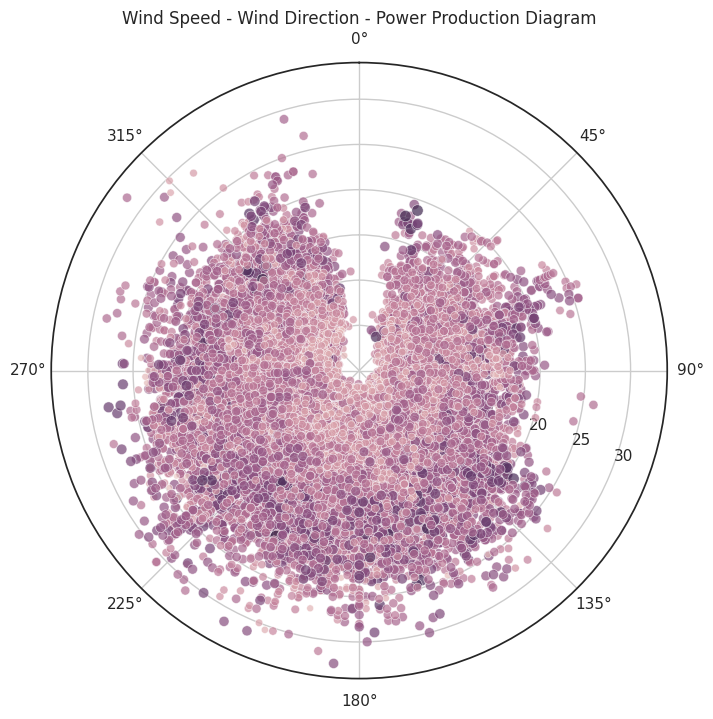

In [ ]:
# Creating the polar diagram
from math import radians

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
# Inside circles are the wind speed and marker color and size represents the amount of power production
sns.scatterplot(x=[radians(x) for x in merged_df_hourly_df['average_wind_dir']],
                y=merged_df_hourly_df['average_wind_speed'],
                size=merged_df_hourly_df['ActualGenerationMW'],
                hue=merged_df_hourly_df['ActualGenerationMW'],
                alpha=0.7, legend=None)
# Setting the polar diagram's top represents the North
ax.set_theta_zero_location('N')
# Setting -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
ax.set_rlabel_position(110)
plt.title('Wind Speed - Wind Direction - Power Production Diagram')
plt.ylabel(None);


### LinePlot

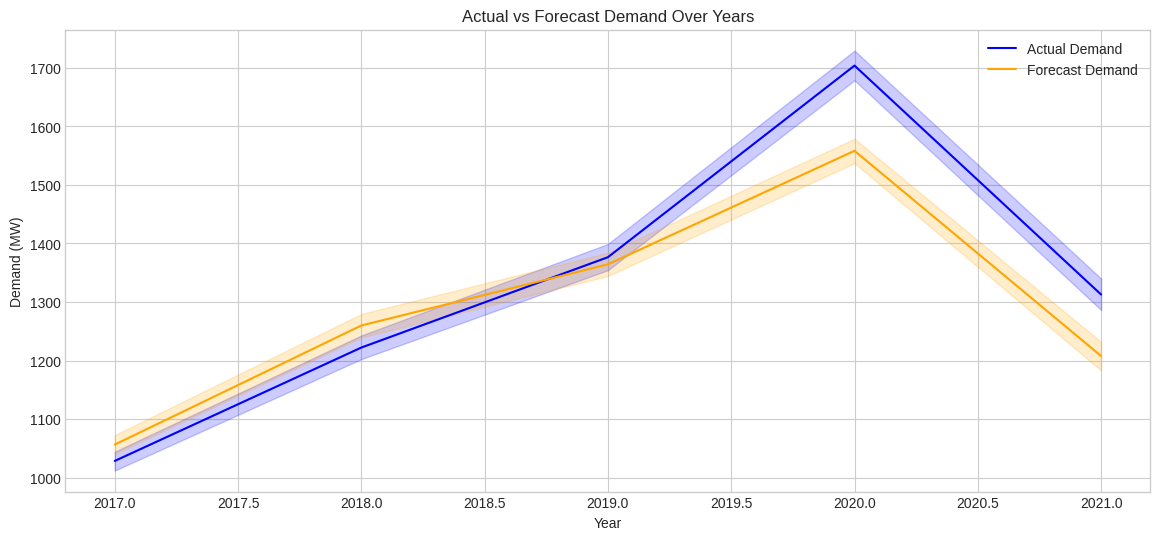

In [ ]:
# Line plot for Actual Demand and Forecast Demand over Years
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='ForecastWndMW', data=merged_df_hourly_df, label='Actual Demand', color='blue')
sns.lineplot(x='Year', y='ActualWindMW', data=merged_df_hourly_df, label='Forecast Demand', color='orange')
plt.xlabel('Year')
plt.ylabel('Demand (MW)')
plt.title('Actual vs Forecast Demand Over Years')
plt.legend()
plt.show()

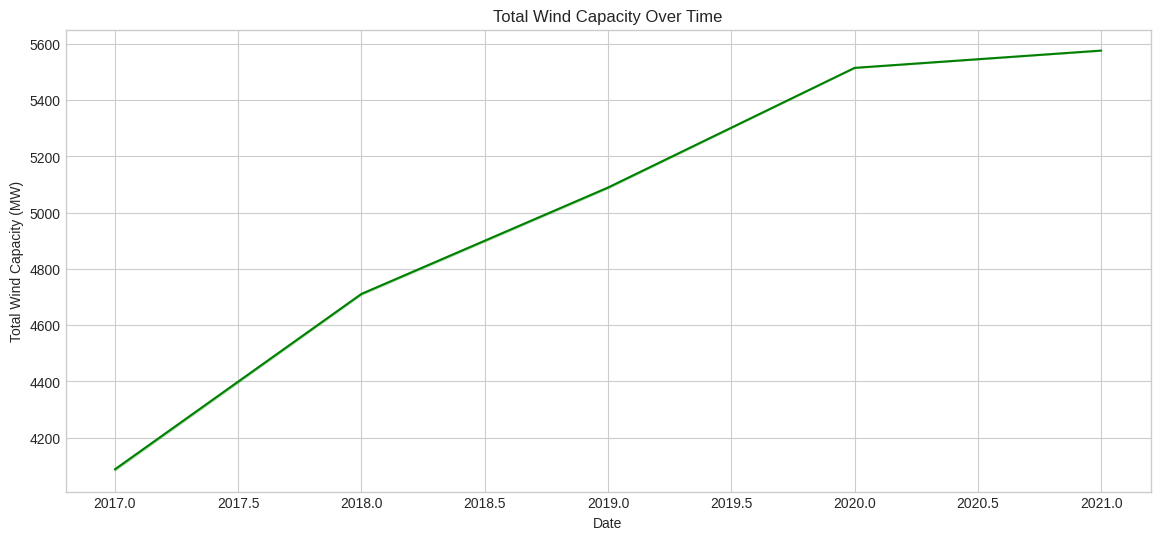

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='TotalWindCapacityMW', data=merged_df_hourly_df, color='green')
plt.xlabel('Date')
plt.ylabel('Total Wind Capacity (MW)')
plt.title('Total Wind Capacity Over Time')
plt.show()


### Box Plot

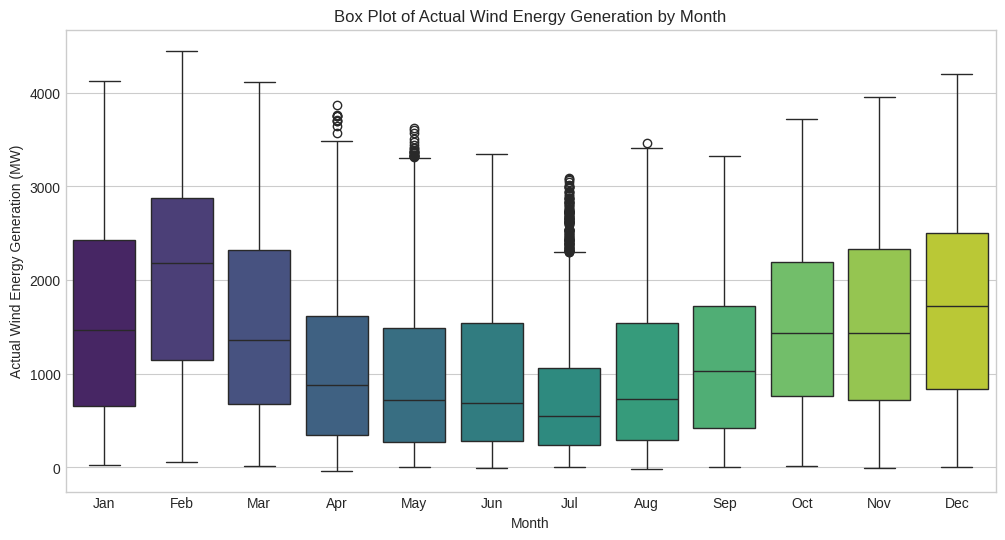

In [ ]:
# Box plot of Actual Wind Energy Generation by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='ActualWindMW', data=merged_df_hourly_df, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Box Plot of Actual Wind Energy Generation by Month')
plt.show()

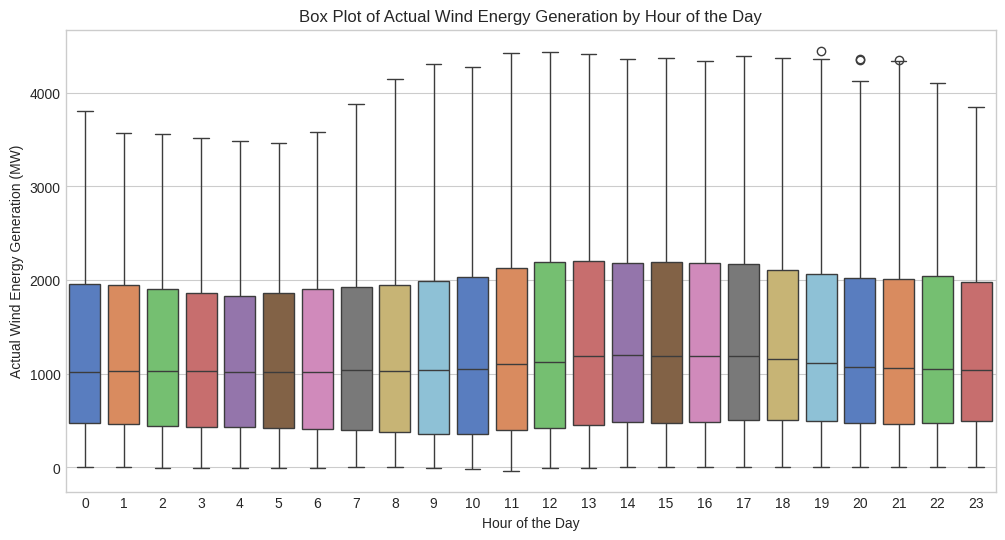

In [ ]:
# Box plot of Actual Wind Energy Generation by Hour of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='ActualWindMW', data=merged_df_hourly_df, palette='muted')
plt.xlabel('Hour of the Day')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Box Plot of Actual Wind Energy Generation by Hour of the Day')
plt.show()

<ipython-input-8-931c29754764>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='average_wind_speed', data=merged_df_hourly_df, palette='muted')


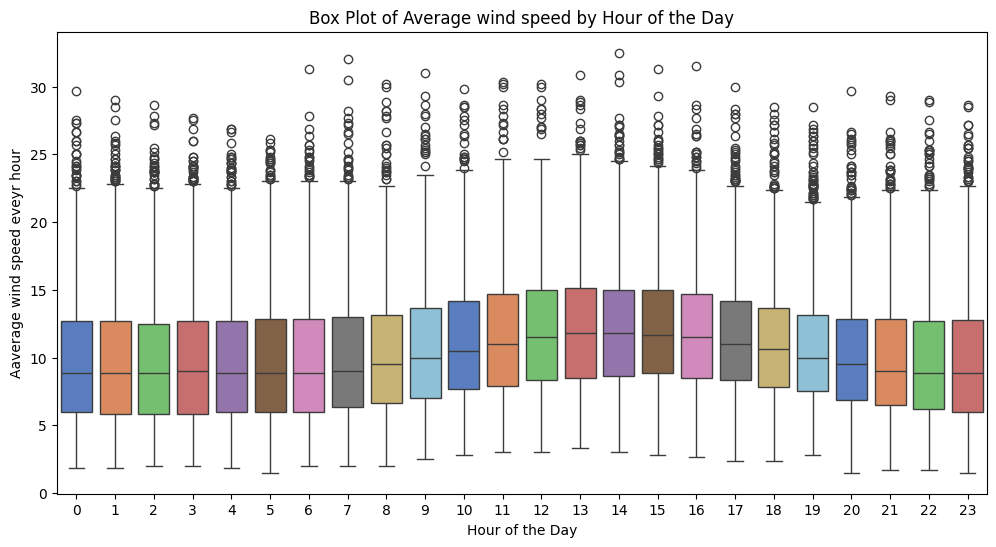

In [ ]:
# Box plot of average_wind_speed Generation by Hour of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='average_wind_speed', data=merged_df_hourly_df, palette='muted')
plt.xlabel('Hour of the Day')
plt.ylabel('Aaverage wind speed eveyr hour')
plt.title('Box Plot of Average wind speed by Hour of the Day')
plt.show()

### BarChart

<ipython-input-10-3bff3dbc4397>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['BEL', 'DUB', 'SHAN', 'COR', 'GAL', 'DON'], y=[merged_df_hourly_df['wdsp_BEL'].mean(), merged_df_hourly_df['wdsp_DUB'].mean(),  merged_df_hourly_df['wdsp'].mean(),  merged_df_hourly_df['wdsp_COR'].mean(),  merged_df_hourly_df['wdsp_GAL'].mean(),  merged_df_hourly_df['wdsp_DON'].mean()], palette="viridis")


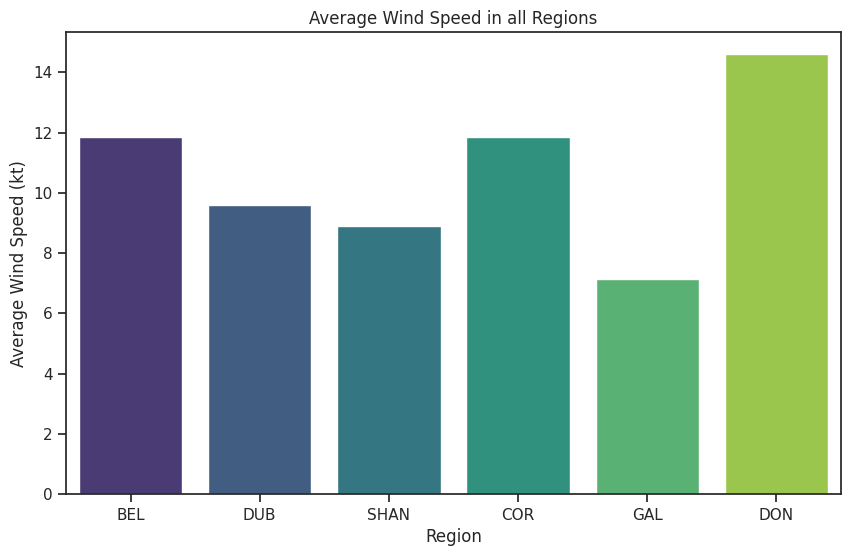

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a bar chart for average wind speed in all regions
plt.figure(figsize=(10, 6))
sns.barplot(x=['BEL', 'DUB', 'SHAN', 'COR', 'GAL', 'DON'], y=[merged_df_hourly_df['wdsp_BEL'].mean(), merged_df_hourly_df['wdsp_DUB'].mean(),  merged_df_hourly_df['wdsp'].mean(),  merged_df_hourly_df['wdsp_COR'].mean(),  merged_df_hourly_df['wdsp_GAL'].mean(),  merged_df_hourly_df['wdsp_DON'].mean()], palette="viridis")
plt.title('Average Wind Speed in all Regions')
plt.xlabel('Region')
plt.ylabel('Average Wind Speed (kt)')
plt.show()


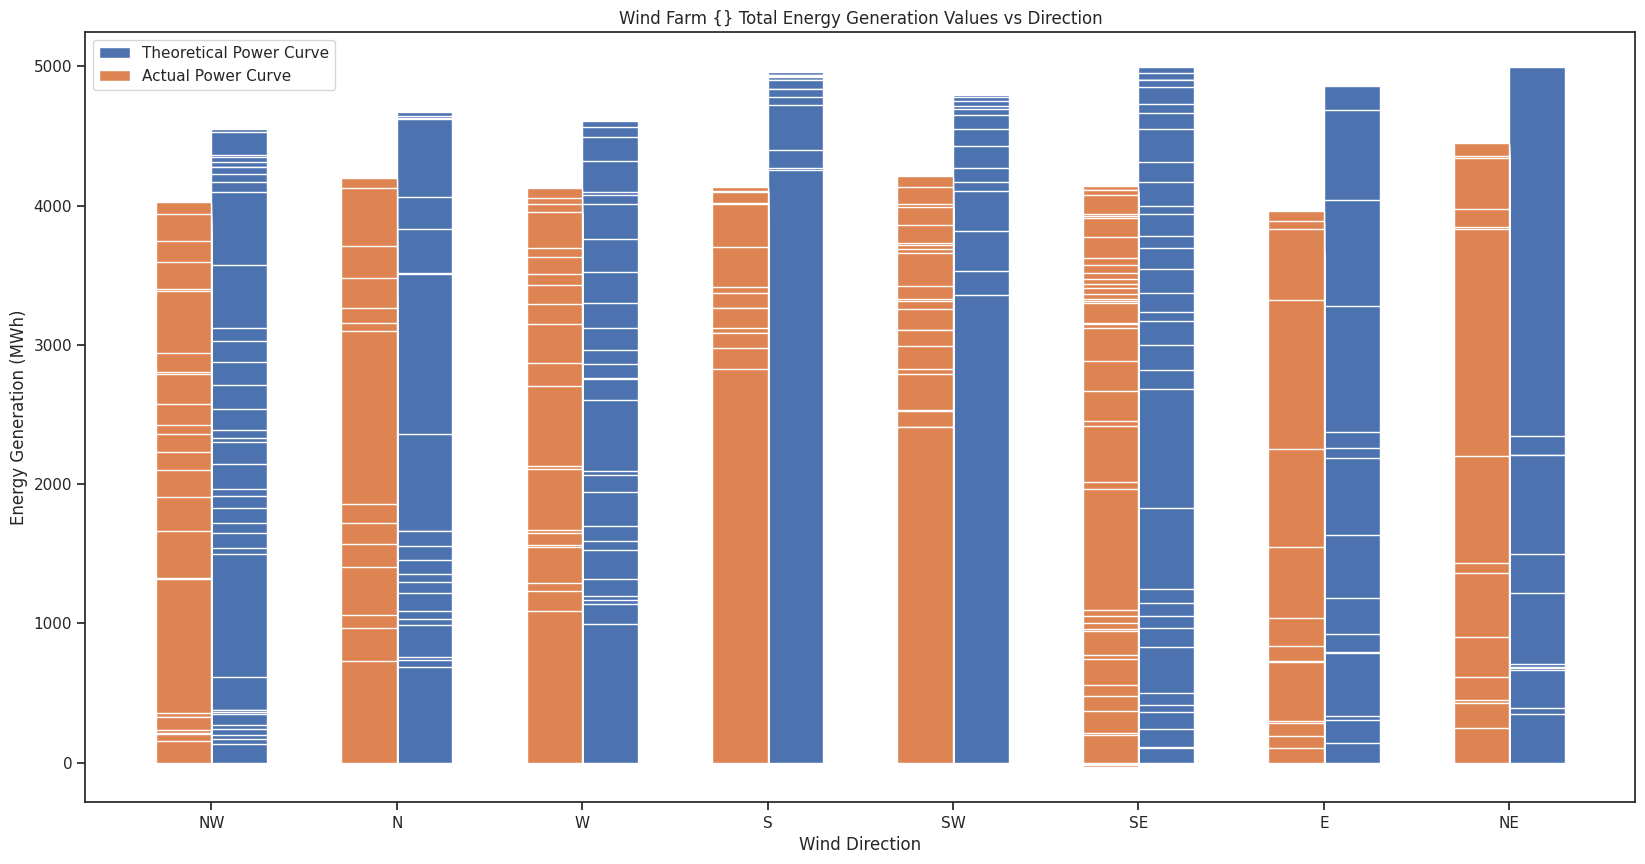

In [ ]:
#Drawing graph of total generations according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(merged_df_hourly_df["rounded_wind_direction"],merged_df_hourly_df["ForecastWndMW"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(merged_df_hourly_df["rounded_wind_direction"],merged_df_hourly_df["ActualWindMW"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Energy Generation (MWh)")
    plt.title("Wind Farm {} Total Energy Generation Values vs Direction")
    plt.legend()
    plt.show()
bar_graph()

### HeatMap

<ipython-input-13-bc2d52434909>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = merged_df_hourly_df[col_list_numerical].corr()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'ActualDemandMW'),
  Text(0, 2.5, 'ForecastWndMW'),
  Text(0, 3.5, 'ActualWindMW'),
  Text(0, 4.5, 'ActualGenerationMW'),
  Text(0, 5.5, 'NetTotal_MW'),
  Text(0, 6.5, 'EWIC_MW'),
  Text(0, 7.5, 'MOYLE_MW'),
  Text(0, 8.5, 'hour'),
  Text(0, 9.5, 'isweekday'),
  Text(0, 10.5, 'month'),
  Text(0, 11.5, 'year'),
  Text(0, 12.5, 'average_wind_speed'),
  Text(0, 13.5, 'average_temp'),
  Text(0, 14.5, 'average_rain')])

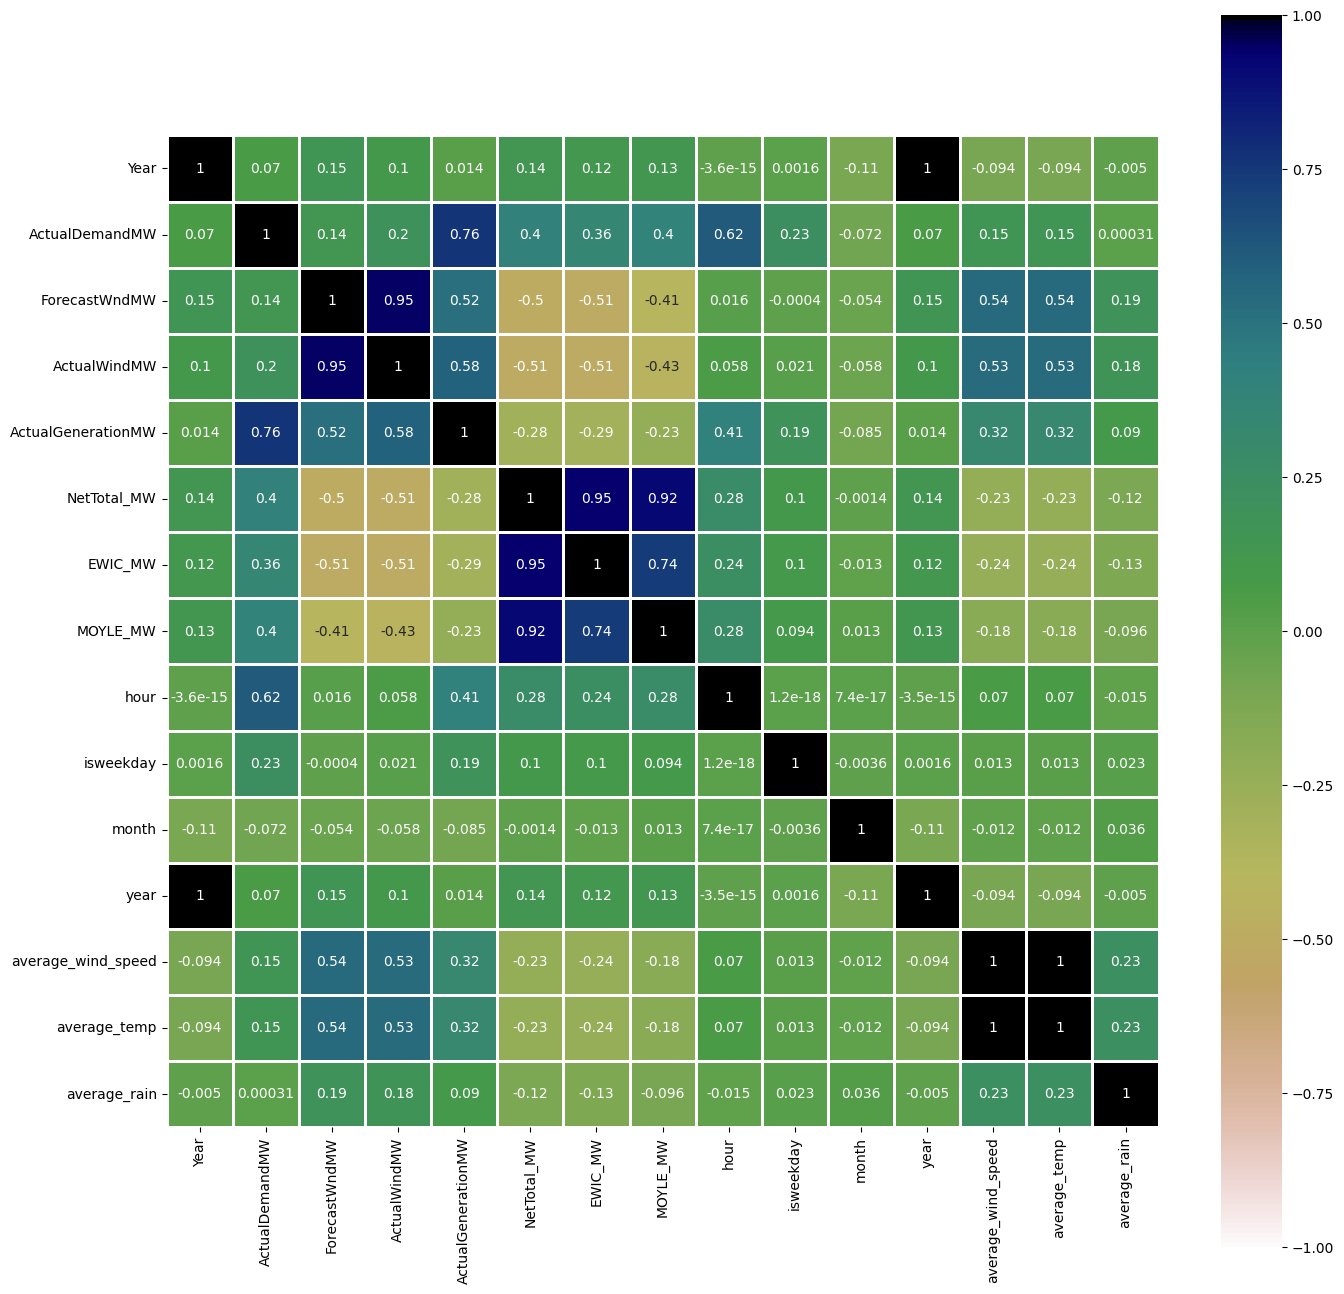

In [13]:
col_list_numerical = ['date', 'Year', 'Month', 'DayTime', ' REGION', 'ActualDemandMW',
       'ForecastWndMW', 'ActualWindMW',
       'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW', 'MOYLE_MW', 'hour',
       'isweekday', 'month', 'year', 'average_wind_speed', 'average_temp', 'average_rain' ]

df_corr = merged_df_hourly_df[col_list_numerical].corr()

plt.figure(figsize=[16, 16])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

<ipython-input-11-fc1148e84e7a>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = merged_df_hourly_df[col_list_numerical].corr()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, 'Unnamed: 0.1'),
  Text(0, 1.5, 'Unnamed: 0'),
  Text(0, 2.5, 'Year'),
  Text(0, 3.5, 'ActualDemandMW'),
  Text(0, 4.5, 'ForecastWndMW'),
  Text(0, 5.5, 'ActualWindMW'),
  Text(0, 6.5, 'ActualGenerationMW'),
  Text(0, 7.5, 'NetTotal_MW'),
  Text(0, 8.5, 'EWIC_MW'),
  Text(0, 9.5, 'MOYLE_MW'),
  Text(0, 10.5, 'hour'),
  Text(0, 11.5, 'isweekday'),
  Text(0, 12.5, 'month'),
  Text(0, 13.5, 'year'),
  Text(0, 14.5, 'rain_BEL'),
  Text(0, 15.5, 'temp_BEL'),
  Text(0, 16.5, 'wetb_BEL'),
  Text(0, 17.5, 'dewpt_BEL'),
  Text(0, 18.5, 'vappr_BEL'),
  Text(0, 19.5, 'rhum_BEL'),
  Text(0, 20.5, 'msl_BEL'),
  Text(0, 21.5, 'wdsp_BEL'),
  Text(0, 22.5, 'wddir_BEL'),
  Text(0, 23.5, 'TotalWindCapacityMW')])

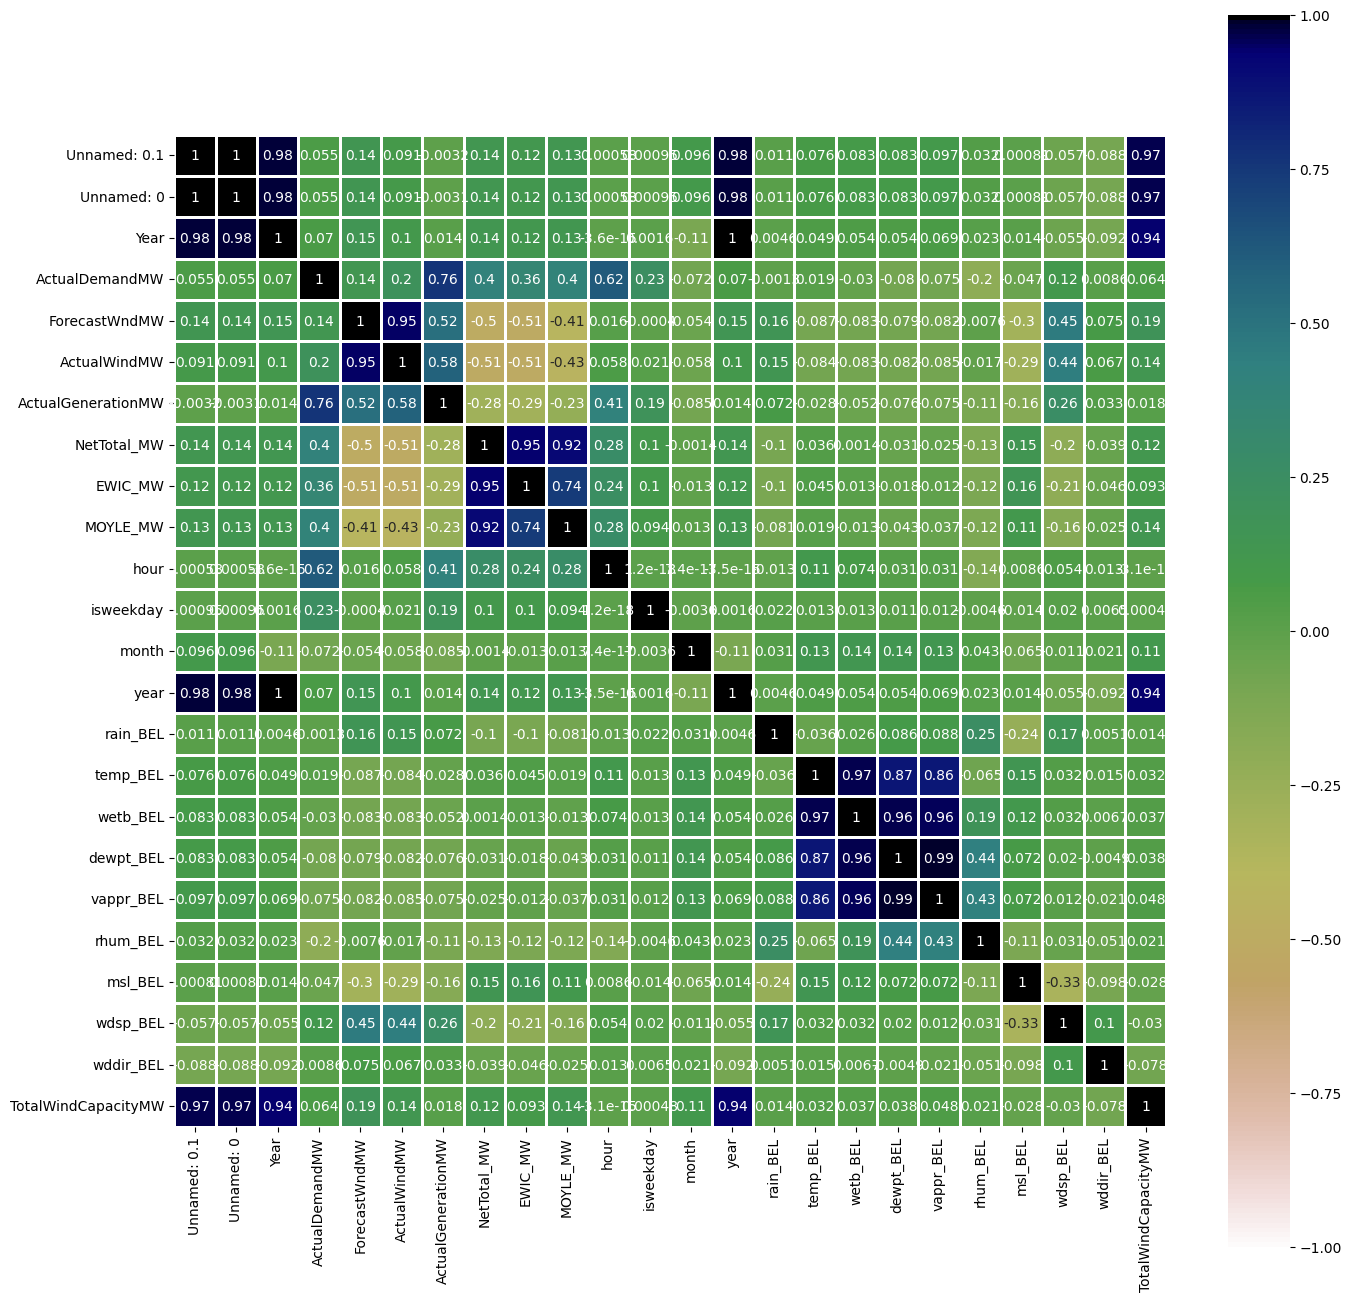

In [11]:
col_list_numerical = ['Unnamed: 0.1', 'date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL',
       'TotalWindCapacityMW']

df_corr = merged_df_hourly_df[col_list_numerical].corr()

plt.figure(figsize=[16, 16])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

### Violinplot

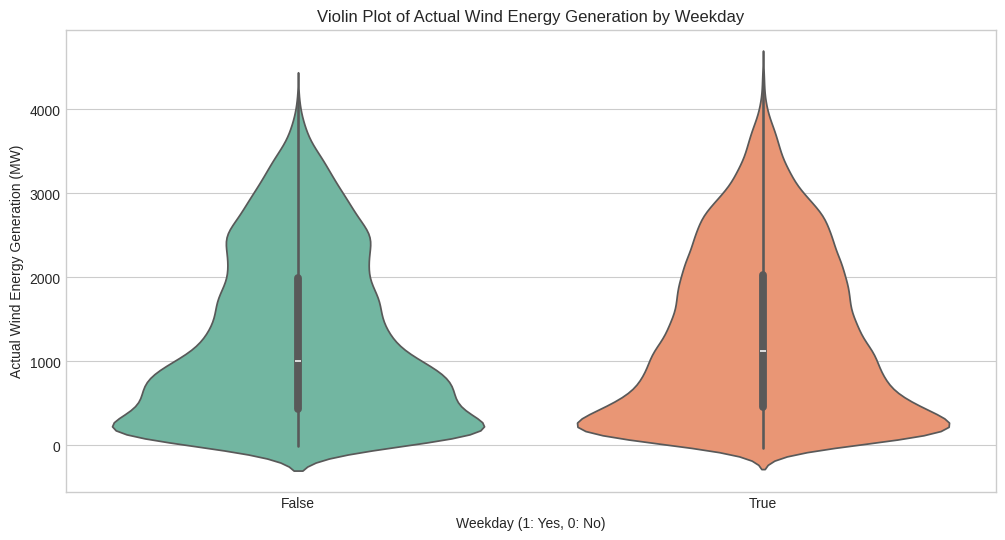

In [ ]:
# Violin plot for Actual Wind Energy Generation by weekday
plt.figure(figsize=(12, 6))
sns.violinplot(x='isweekday', y='ActualWindMW', data=merged_df_hourly_df, palette='Set2')
plt.xlabel('Weekday (1: Yes, 0: No)')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Violin Plot of Actual Wind Energy Generation by Weekday')
plt.show()

### Kdeplot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1889: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)


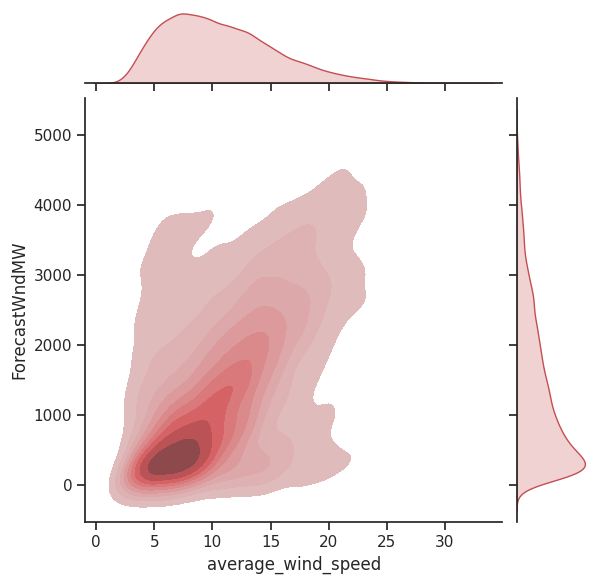

In [ ]:


#Relationship between 'average_wind_speed' and 'ForecastWndMW'.

sns.set(style='ticks', color_codes=True)
g = sns.JointGrid(x='average_wind_speed', y='ForecastWndMW',data=merged_df_hourly_df, height=6)
g = g.plot_joint(sns.kdeplot, color="r", shade=True)
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

## Hyperparameter tuning

### Import libraries

In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.
import requests
from io import StringIO
import plotly.express as px
import seaborn as sns

In [93]:

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v5.csv'

# Read the CSV file into a Pandas DataFrame
newdf = pd.read_csv(github_url)

# Display the first few rows of the DataFrame to understand its structure
print(newdf.head())

   Unnamed: 0.2  Unnamed: 0.1              date  Unnamed: 0  Year Month  \
0             0             0  01/01/2017 00:00           0  2017   Jan   
1             1             1  01/01/2017 01:00           4  2017   Jan   
2             2             2  01/01/2017 02:00           8  2017   Jan   
3             3             3  01/01/2017 03:00          12  2017   Jan   
4             4             4  01/01/2017 04:00          16  2017   Jan   

     DayTime      REGION  ActualDemandMW   FORECAST DEMAND(MW)  ...  \
0  01, 00:00  All Island            3696                   NaN  ...   
1  01, 01:00  All Island            3457                   NaN  ...   
2  01, 02:00  All Island            3244                   NaN  ...   
3  01, 03:00  All Island            3005                   NaN  ...   
4  01, 04:00  All Island            2847                   NaN  ...   

   vappr_DON  rhum_DON  msl_DON  wdsp_DON  wddir_DON  TotalWindCapacityMW  \
0        6.7        70   1020.6        19    

In [94]:
#Krystian: Looking for maximal extreme values
print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.describe()

-----------DATA SIZE -------------
(41616, 93)
Rows:  41616 , Columns:  93
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41616 entries, 0 to 41615
Data columns (total 93 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.2            41616 non-null  int64  
 1   Unnamed: 0.1            41616 non-null  int64  
 2   date                    41616 non-null  object 
 3   Unnamed: 0              41616 non-null  int64  
 4   Year                    41616 non-null  int64  
 5   Month                   41616 non-null  object 
 6   DayTime                 41616 non-null  object 
 7    REGION                 41616 non-null  object 
 8   ActualDemandMW          41616 non-null  int64  
 9    FORECAST DEMAND(MW)    0 non-null      float64
 10  ForecastWndMW           41616 non-null  int64  
 11  ActualWindMW            41616 non-null  int64  
 12  ActualGenerationMW      41616 non-

Unnamed: 0.2  Unnamed: 0.1     Unnamed: 0          Year  \
count  41616.000000  41616.000000   41616.000000  41616.000000   
mean   20807.500000  20807.500000   83238.183775   2018.894464   
std    12013.648738  12013.648738   48059.993083      1.371939   
min        0.000000      0.000000       0.000000   2017.000000   
25%    10403.750000  10403.750000   41619.000000   2018.000000   
50%    20807.500000  20807.500000   83238.000000   2019.000000   
75%    31211.250000  31211.250000  124857.000000   2020.000000   
max    41615.000000  41615.000000  166476.000000   2021.000000   

       ActualDemandMW   FORECAST DEMAND(MW)  ForecastWndMW  ActualWindMW  \
count    41616.000000                   0.0   41616.000000  41616.000000   
mean      4201.338548                   NaN    1329.856377   1293.847222   
std        833.885405                   NaN    1063.490605    970.022068   
min       2413.000000                   NaN      10.000000    -34.000000   
25%       3475.000000                   NaN     446.000000    447.000000   
50%       4272.000000                   NaN    1043.000000   1085.000000   
75%       4820.000000                   NaN    1991.000000   2018.000000   
max       6798.000000                   NaN    4993.000000   4451.000000   

       ActualGenerationMW   NetTotal_MW  ...     dewpt_DON     vappr_DON  \
count        41616.000000  41616.000000  ...  41616.000000  41616.000000   
mean          4213.243608     20.013144  ...      7.162985     10.520302   
std            739.811549    518.902843  ...      4.309924      3.053930   
min           1948.000000   -908.000000  ...     -7.900000      3.400000   
25%           3720.000000   -440.000000  ...      3.900000      8.100000   
50%           4153.000000    -15.000000  ...      7.300000     10.200000   
75%           4665.000000    419.000000  ...     10.400000     12.700000   
max           7501.000000    979.000000  ...     17.900000     20.500000   

           rhum_DON       msl_DON      wdsp_DON    wddir_DON  \
count  41616.000000  41616.000000  41616.000000  41616.00000   
mean      81.533929   1011.655753     14.596117    198.70050   
std        9.891654     13.211750      7.306203     86.67948   
min       20.000000    956.600000      1.000000     10.00000   
25%       75.000000   1003.000000      9.000000    140.00000   
50%       83.000000   1013.300000     14.000000    200.00000   
75%       89.000000   1021.000000     19.000000    260.00000   
max      100.000000   1051.200000     48.000000    360.00000   

       TotalWindCapacityMW  average_temp  average_wind_speed  average_wind_dir  
count         41616.000000  41616.000000        41616.000000      41616.000000  
mean           4965.127145     10.660475           10.660475        198.814358  
std             564.669512      4.768135            4.768135         67.125927  
min            3747.979000      1.500000            1.500000         11.666667  
25%            4595.970000      7.000000            7.000000        151.666667  
50%            5006.080000     10.000000           10.000000        203.333333  
75%            5523.095000     13.666667           13.666667        248.333333  
max            5576.095000     32.500000           32.500000        355.000000  

[8 rows x 87 columns]

### New Section

## Machine learning models

## Time series models

## Comparing models